<a href="https://colab.research.google.com/github/purvanshgarg/tasks_sparks/blob/main/Unsupervised_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Prediction Using Unsupervised ML 

---



# Task 1 for #GRIP rotational Internship 


# We are given iris dataset, predict the no of clusters and represent it visually 

**#Importing Libraries**

In [1]:

import numpy as np #numpy library for numerical operations 
import matplotlib.pyplot as plt # for plotting of data
import pandas as pd #for creating and handling a dataframe
from sklearn import datasets # for making use of dataset

**#Loading the dataset**

In [3]:
data = datasets.load_iris() #loading the dataset
dataset = pd.DataFrame(iris.data, columns = iris.feature_names) # creating a dataframe
dataset.head() #printig the first five rows of the dataframe created

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


**#Finding the optimum number of clusters for k-means**

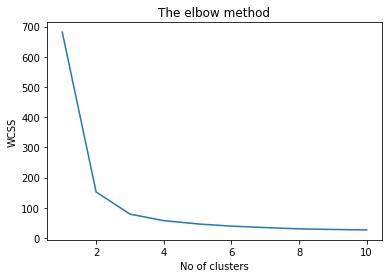

In [6]:
x = dataset.iloc[:, [0, 1, 2, 3]].values                 # conversion into a matrix

from sklearn.cluster import KMeans                 #importing k means model
wcss = []

for i in range(1, 11):

    classifier = KMeans(n_clusters = i, init = 'k-means++', 
                    max_iter = 300, n_init = 10, random_state = 0)                            #optimum clusters
    classifier.fit(x)
    wcss.append(classifier.inertia_)                             #calculation of wcss
    
# Plotting the results onto a line graph

plt.plot(range(1, 11), wcss)

plt.title('The elbow method')         # plot title, the method used

plt.xlabel('No of clusters')           # x axes label

plt.ylabel('WCSS')                     # Within Cluster Sum Of Squares(y axes label)

plt.show()                             #plot output

From this graph the elbow is found on "3" so it is taken as the no. of clusters

In [8]:
classifier= KMeans(n_clusters = 3, init = 'k-means++',
                max_iter = 300, n_init = 10, random_state = 0) 

y = classifier.fit_predict(x)                             #applying classifier


**#Visualising the clusters**

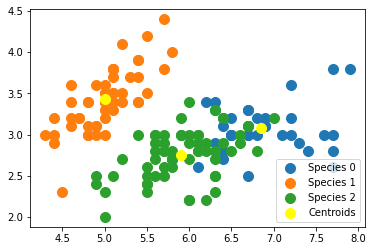

In [16]:
for i in np.unique(y):

  plt.scatter(x[y==i,0],x[y==i,1],label="Species "+str(i),s=100)     # for plotting clusters
plt.scatter(classifier.cluster_centers_[:, 0], classifier.cluster_centers_[:,1], 
            s = 100, c = 'yellow', label = 'Centroids')                                              #for plotting centroids of clusters

plt.legend()